In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
#reading the data as dataframe
df=pd.read_csv("train.csv")

In [2]:
#structured data in tabular form
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [3]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [4]:
#data format check all are in correct format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [5]:
#handling missing values
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


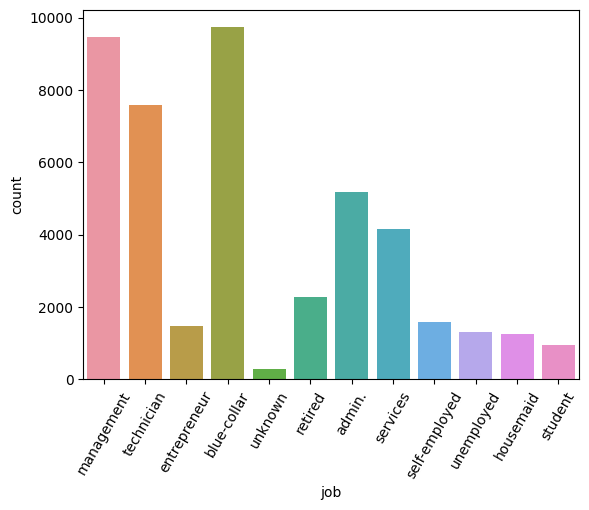

In [6]:
#checking the categorical features column by column  if missing value filled other than np.nan (ie) unknown
print(df["job"].value_counts())
sns.countplot(x=df["job"])    #unknown column is 288 which is missing value
plt.xticks(rotation=60)
plt.show()

In [7]:
#droping unknown job and eduaction_qual column 
index=df[(df["job"]=="unknown") & (df["education_qual"]=="unknown")].index
#print(index)
df.drop(index,inplace=True)
print(df["job"].value_counts())   # to handle 161 rows

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           161
Name: job, dtype: int64


secondary    23202
tertiary     13301
primary       6851
unknown       1730
Name: education_qual, dtype: int64


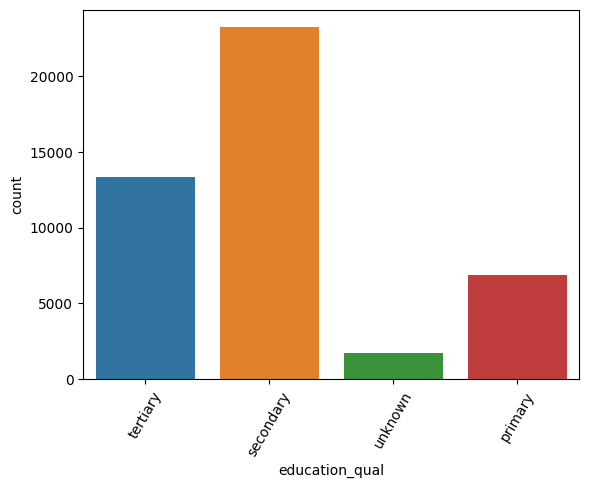

In [8]:
print(df["education_qual"].value_counts())
sns.countplot(x=df["education_qual"])    
plt.xticks(rotation=60)
plt.show()
#unknown values 1857 is missing values 

In [9]:
#to fill unknown value with mode
#checking unknown in both column one by one
pd.DataFrame(df[["job","education_qual"]]).value_counts()

job            education_qual
management     tertiary          7801
blue-collar    secondary         5371
technician     secondary         5229
admin.         secondary         4219
blue-collar    primary           3758
services       secondary         3457
technician     tertiary          1968
management     secondary         1121
retired        secondary          984
self-employed  tertiary           833
retired        primary            795
unemployed     secondary          728
entrepreneur   tertiary           686
housemaid      primary            627
self-employed  secondary          577
admin.         tertiary           572
entrepreneur   secondary          542
student        secondary          508
blue-collar    unknown            454
housemaid      secondary          395
retired        tertiary           366
services       primary            345
management     primary            294
unemployed     tertiary           289
               primary            257
technician     unkno

In [10]:
#handling education column unknown values
#In mangement job, tertiary educational_qualification is more
# so imputing mangement job and unknown educational_qualification with tertiary
df.loc[(df["job"]=="management") & (df["education_qual"]=="unknown"),"education_qual"]="tertiary"

#blue-collar and unknown--->blue-collar and secondary
df.loc[(df["job"]=="blue-collar") & (df["education_qual"]=="unknown"),"education_qual"]="secondary"


#technician and unknown--->technician and secondary
df.loc[(df["job"]=="technician") & (df["education_qual"]=="unknown"),"education_qual"]="secondary"

#admin. and unknown--->admin. and secondary
df.loc[(df["job"]=="admin.") & (df["education_qual"]=="unknown"),"education_qual"]="secondary"


#services and unknown--->services and secondary
df.loc[(df["job"]=="services") & (df["education_qual"]=="unknown"),"education_qual"]="secondary"


#retired and unknown--->retired and secondary
df.loc[(df["job"]=="retired") & (df["education_qual"]=="unknown"),"education_qual"]="secondary"

#handling job columns unknown values
# jobs unknown column updating by mode of education_qual
#unknown jobs,tertiary --> management and tertiary
df.loc[(df["education_qual"]=="tertiary") & (df["job"]=="unknown"),"job"]="management"

#unknown jobs,secondary --> blue-collar and secondary
df.loc[(df["education_qual"]=="secondary") & (df["job"]=="unknown"),"job"]="blue-collar"

#unknown jobs,primary --> blue-collar and primary
df.loc[(df["education_qual"]=="primary") & (df["job"]=="unknown"),"job"]="blue-collar"

In [11]:
#droping education_qual unknown column if job is self-employed, entrepreneur, unemployed, housemaid,student
#since above columns could be of any education qualification
index=df[(df["job"]=="self-employed") & (df["education_qual"]=="unknown")].index
df.drop(index,inplace=True)
index=df[(df["job"]=="entrepreneur") & (df["education_qual"]=="unknown")].index
df.drop(index,inplace=True)
index=df[(df["job"]=="unemployed") & (df["education_qual"]=="unknown")].index
df.drop(index,inplace=True)
index=df[(df["job"]=="housemaid") & (df["education_qual"]=="unknown")].index
df.drop(index,inplace=True)
index=df[(df["job"]=="student") & (df["education_qual"]=="unknown")].index
df.drop(index,inplace=True)

In [12]:
#checking whether unknown value is updated correctly
print(pd.DataFrame(df[["job","education_qual"]]).value_counts())

job            education_qual
management     tertiary          8082
blue-collar    secondary         5896
technician     secondary         5471
admin.         secondary         4390
blue-collar    primary           3809
services       secondary         3607
technician     tertiary          1968
management     secondary         1121
retired        secondary         1103
self-employed  tertiary           833
retired        primary            795
unemployed     secondary          728
entrepreneur   tertiary           686
housemaid      primary            627
self-employed  secondary          577
admin.         tertiary           572
entrepreneur   secondary          542
student        secondary          508
housemaid      secondary          395
retired        tertiary           366
services       primary            345
management     primary            294
unemployed     tertiary           289
               primary            257
student        tertiary           223
admin.         prima

married     26979
single      12568
divorced     5185
Name: marital, dtype: int64


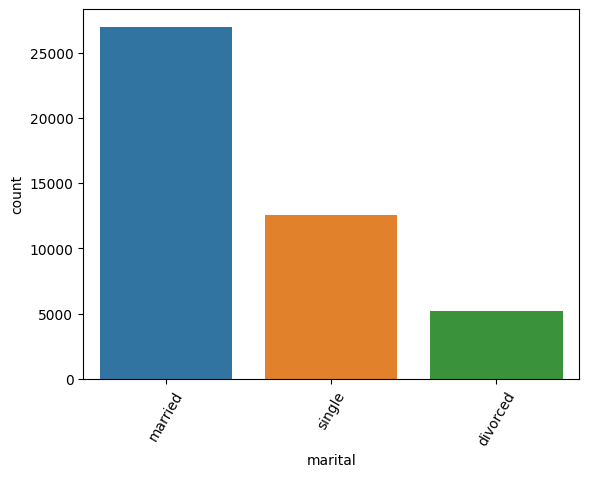

In [13]:
print(df["marital"].value_counts())
sns.countplot(x=df["marital"])    
plt.xticks(rotation=60)
plt.show()
#no missing values 

cellular     29009
unknown      12880
telephone     2843
Name: call_type, dtype: int64


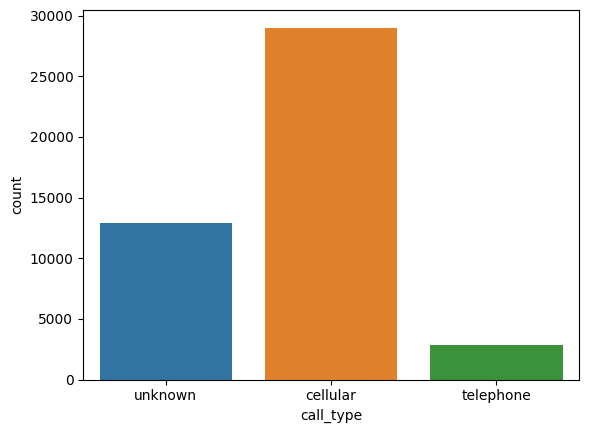

In [14]:
print(df["call_type"].value_counts())
sns.countplot(x=df["call_type"])    
#plt.xticks(rotation=60)
plt.show()
#unknown values 12880 is missing values since call dur is not 0 for columns

cellular     41889
telephone     2843
Name: call_type, dtype: int64


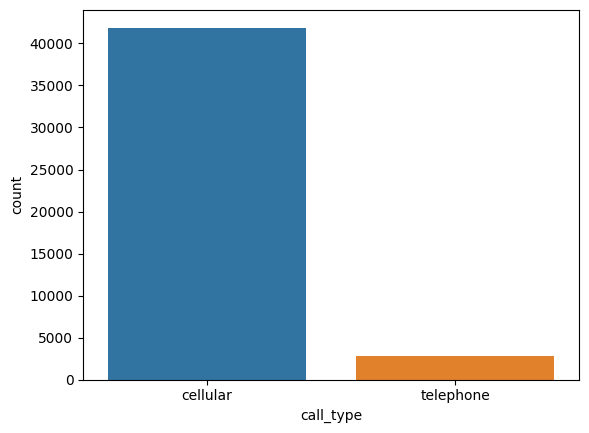

In [15]:
#so filling call_type with mode
df.loc[df["call_type"]=="unknown","call_type"]=st.mode(df["call_type"])
df["call_type"].value_counts()
print(df["call_type"].value_counts())
sns.countplot(x=df["call_type"])    
#plt.xticks(rotation=60)
plt.show()

may    13682
jul     6839
aug     6175
jun     5233
nov     3942
apr     2907
feb     2612
jan     1383
oct      730
sep      557
mar      465
dec      207
Name: mon, dtype: int64


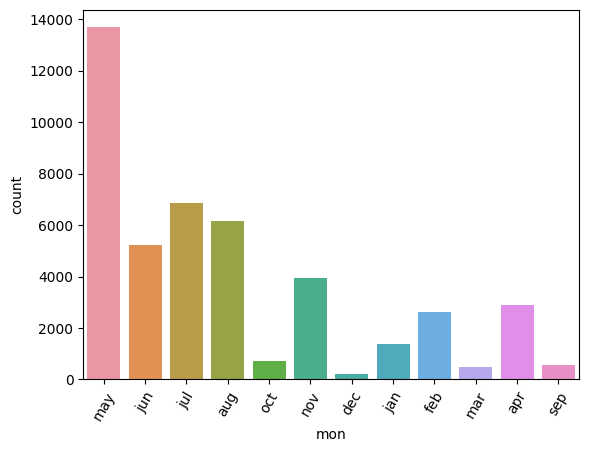

In [16]:
print(df["mon"].value_counts())
sns.countplot(x=df["mon"])    
plt.xticks(rotation=60)
plt.show()

AxesSubplot(0.125,0.11;0.775x0.77)


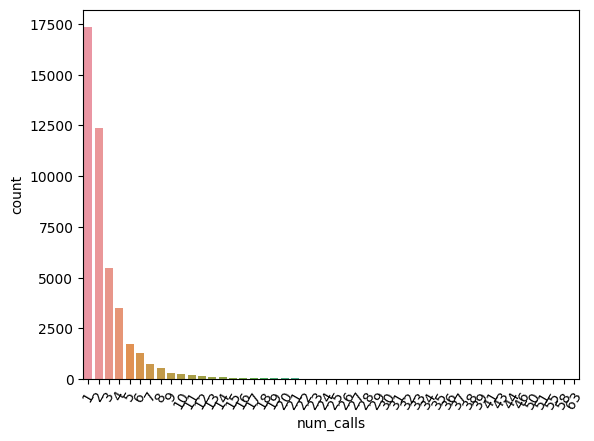

In [17]:
#print(df["num_calls"].value_counts())
print(sns.countplot(x=df["num_calls"]))
plt.xticks(rotation=60)
plt.show()

unknown    36570
failure     4848
other       1823
success     1491
Name: prev_outcome, dtype: int64


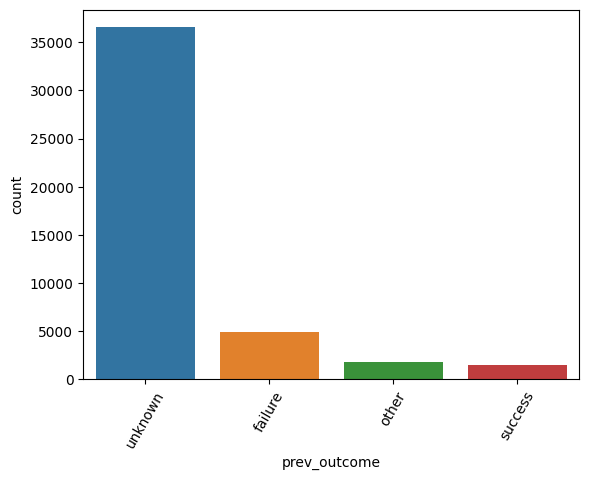

In [18]:
print(df["prev_outcome"].value_counts())
sns.countplot(x=df["prev_outcome"])    
plt.xticks(rotation=60)
plt.show()

In [19]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,cellular,5,may,261,1,unknown,no
1,44,technician,single,secondary,cellular,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,cellular,5,may,76,1,unknown,no
3,47,blue-collar,married,secondary,cellular,5,may,92,1,unknown,no
5,35,management,married,tertiary,cellular,5,may,139,1,unknown,no


C:\Users\MURUGAN K\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


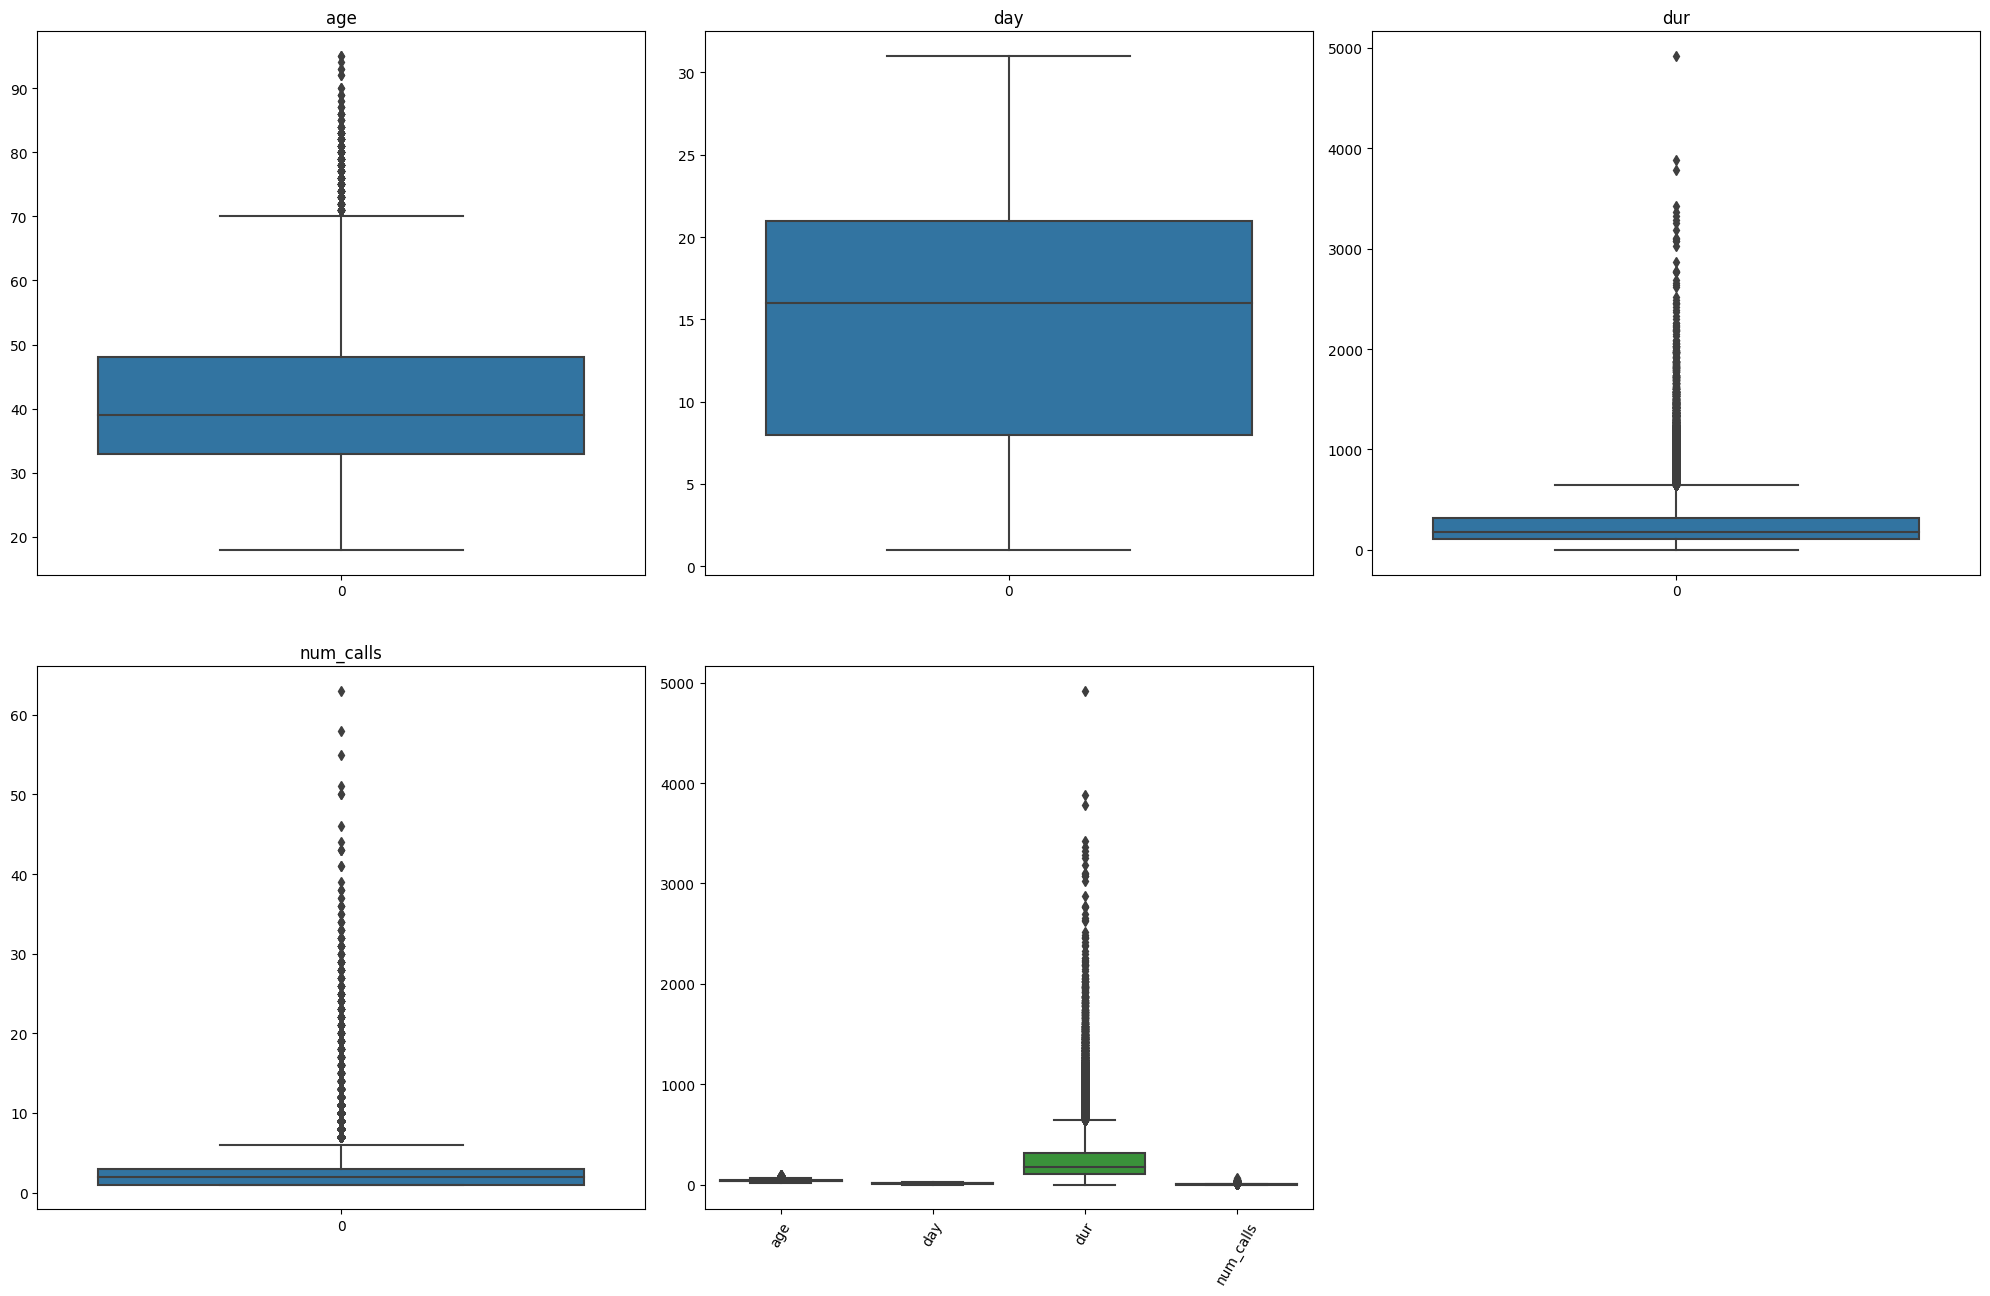

In [20]:
#checking for outliers only for numerical data
plt.figure(figsize=(20,25))
plt.subplot(431)
sns.boxplot(df["age"])
plt.title("age")

plt.subplot(432)
sns.boxplot(df["day"])
plt.title("day")

plt.subplot(433)
sns.boxplot(df["dur"])
plt.title("dur")

plt.subplot(434)
sns.boxplot(df["num_calls"])
plt.title("num_calls")
#since duration is call timing no need to remove and num_calls also no need to remove and in day there is no outliers
#df.loc[df["age"]>100,["age"]]     #checked age column no age is greater than 100, age also no need to remove outliers
plt.subplot(435)
sns.boxplot(df[["age","day","dur","num_calls"]])
plt.xticks(rotation=60)
plt.tight_layout()

In [21]:
df.shape

(44732, 11)

In [22]:
#droping duplicate values
df=df.drop_duplicates()
df.shape

(44725, 11)

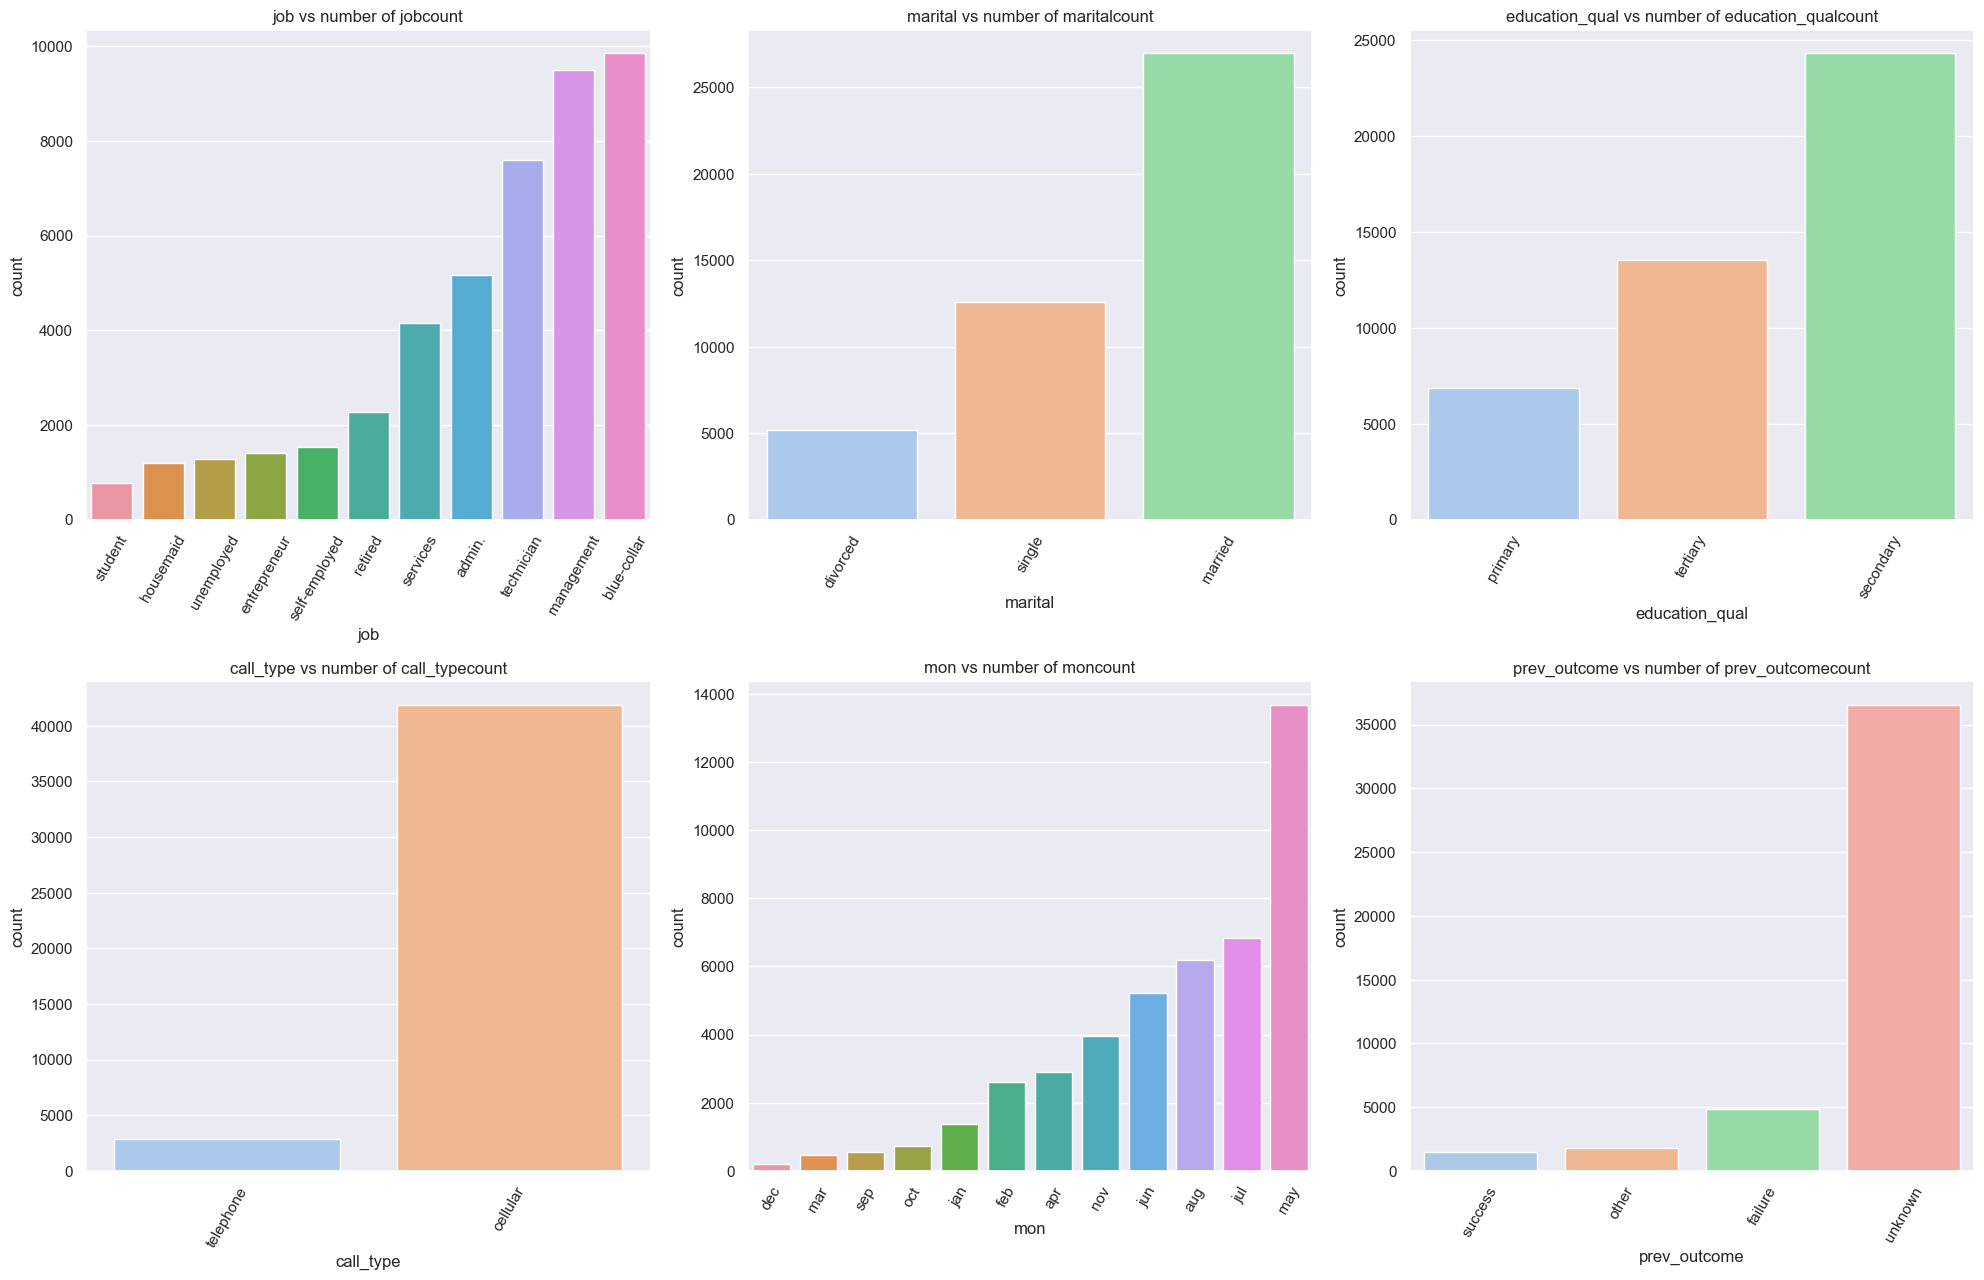

In [23]:
#EDA to predict feature importances
#plotting count plots for all categorical features
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(20,25))
plt.subplot(431)
sns.countplot(x=df["job"],order=df["job"].value_counts().index[::-1])  #plotting in ascending order
plt.xticks(rotation=60)
plt.xlabel("job")
plt.ylabel("count")
plt.title("job vs number of jobcount")

plt.subplot(432)
sns.countplot(x=df["marital"],order=df["marital"].value_counts().index[::-1])  #plotting in ascending order
plt.xticks(rotation=60)
plt.xlabel("marital")
plt.ylabel("count")
plt.title("marital vs number of maritalcount")

plt.subplot(433)
sns.countplot(x=df["education_qual"],order=df["education_qual"].value_counts().index[::-1])  #plotting in ascending order
plt.xticks(rotation=60)
plt.xlabel("education_qual")
plt.ylabel("count")
plt.title("education_qual vs number of education_qualcount")

plt.subplot(434)
sns.countplot(x=df["call_type"],order=df["call_type"].value_counts().index[::-1])  #plotting in ascending order
plt.xticks(rotation=60)
plt.xlabel("call_type")
plt.ylabel("count")
plt.title("call_type vs number of call_typecount")

plt.subplot(435)
sns.countplot(x=df["mon"],order=df["mon"].value_counts().index[::-1])  #plotting in ascending order
plt.xticks(rotation=60)
plt.xlabel("mon")
plt.ylabel("count")
plt.title("mon vs number of moncount")

plt.subplot(436)
sns.countplot(x=df["prev_outcome"],order=df["prev_outcome"].value_counts().index[::-1])  #plotting in ascending order
plt.xticks(rotation=60)
plt.xlabel("prev_outcome")
plt.ylabel("count")
plt.title("prev_outcome vs number of prev_outcomecount")

plt.tight_layout()

Interpretation from above graphs
maximum number of calls made to
1.job (blue-collar)
2.marital status (maried)
3.education qualifiaction (secondary)
4.calls made in cellular is higher
5.in month of may
6.prev_outcome (unknown)

In [24]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,cellular,5,may,261,1,unknown,no
1,44,technician,single,secondary,cellular,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,cellular,5,may,76,1,unknown,no
3,47,blue-collar,married,secondary,cellular,5,may,92,1,unknown,no
5,35,management,married,tertiary,cellular,5,may,139,1,unknown,no


C:\Users\MURUGAN K\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves
C:\Users\MURUGAN K\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves
C:\Users\MURUGAN K\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to 

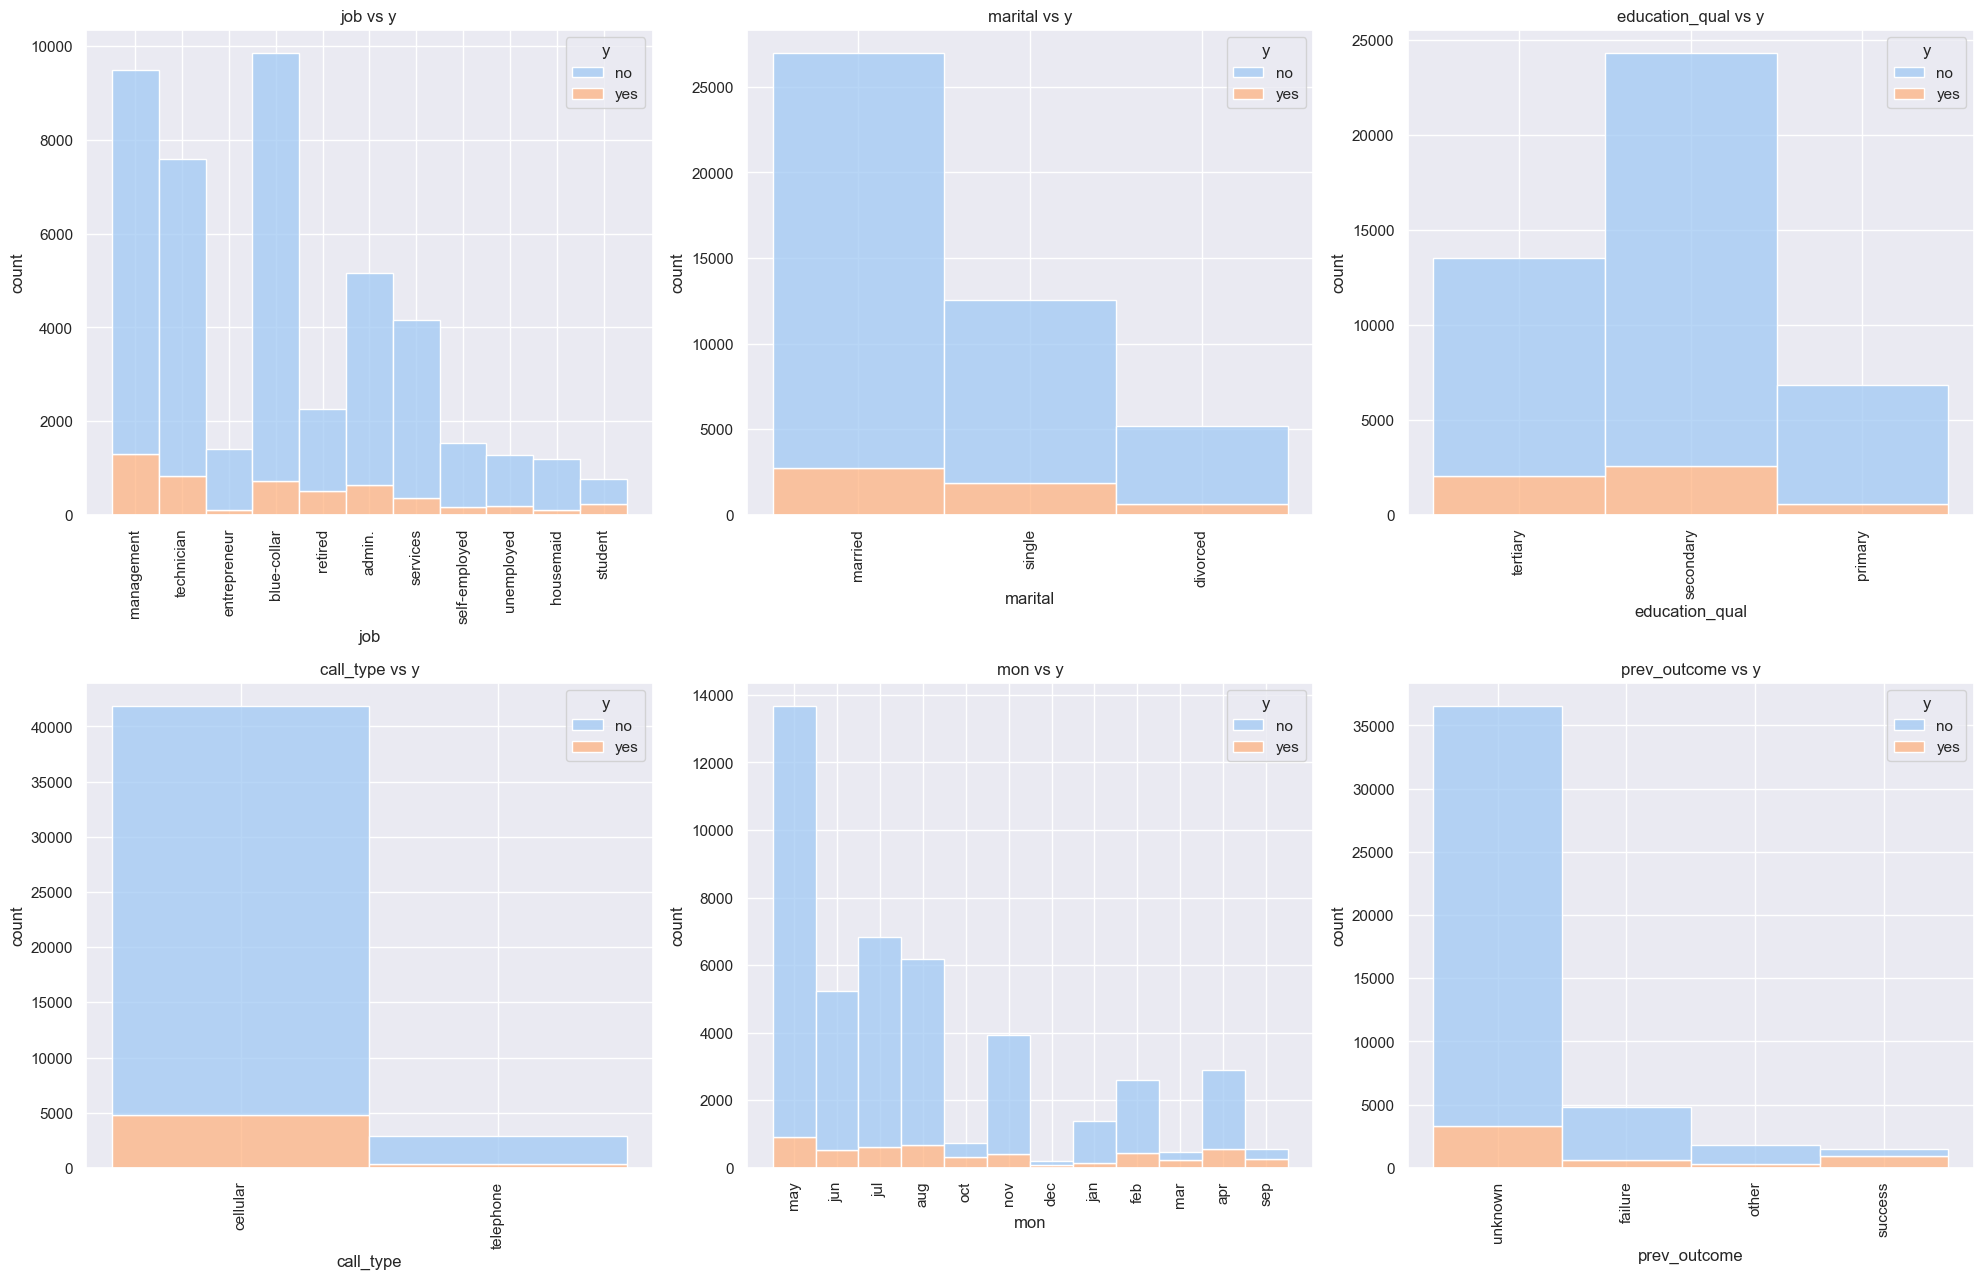

In [25]:
#plotting barplots for categorical vs y output
plt.figure(figsize=(20,25))
plt.subplot(431)
sns.histplot(binwidth=0.5, x=df["job"],hue=df["y"],data=df, stat="count", multiple="stack")
plt.xticks(rotation=90)
plt.xlabel('job')
plt.ylabel('count')
plt.title('job vs y')

plt.subplot(432)
sns.histplot(binwidth=0.5, x=df["marital"],hue=df["y"],data=df, stat="count", multiple="stack")
plt.xticks(rotation=90)
plt.xlabel('marital')
plt.ylabel('count')
plt.title('marital vs y')

plt.subplot(433)
sns.histplot(binwidth=0.5, x=df["education_qual"],hue=df["y"],data=df, stat="count", multiple="stack")
plt.xticks(rotation=90)
plt.xlabel('education_qual')
plt.ylabel('count')
plt.title('education_qual vs y')


plt.subplot(434)
sns.histplot(binwidth=0.5, x=df["call_type"],hue=df["y"],data=df, stat="count", multiple="stack")
plt.xticks(rotation=90)
plt.xlabel('call_type')
plt.ylabel('count')
plt.title('call_type vs y')


plt.subplot(435)
sns.histplot(binwidth=0.5, x=df["mon"],hue=df["y"],data=df, stat="count", multiple="stack")
plt.xticks(rotation=90)
plt.xlabel('mon')
plt.ylabel('count')
plt.title('mon vs y')

plt.subplot(436)
sns.histplot(binwidth=0.5, x=df["prev_outcome"],hue=df["y"],data=df, stat="count", multiple="stack")
plt.xticks(rotation=90)
plt.xlabel('prev_outcome')
plt.ylabel('count')
plt.title('prev_outcome vs y')
plt.tight_layout()


Based on above graph inferred that
1.for job column ordinal encoding inorderwise based on predicted rate in y (yes) linear relationship (since we are interested in predicting customer converted successfully)
housemaid
entrepreneur
self-employed
unemployed
student
services
retired
admin
blue-collar
technician
management
2.marital column no order going with OHE
3.education column going with ordinal encoding based on predicted rate in y (yes) linear relationship
primary,tertiary,secondary
4.call_type ordinal/label encoding 0 ->telephone 1->cellular
5.month ordinal encoding  based on predicted rate in y (yes) linear relationship
dec
jan,
mar,
sep,
oct,
nov,
feb,
jun,
apr,
jul,
aug,
may
6.prev_outcome no order going with OHE

In [26]:
pd.DataFrame(df[["job","y"]]).value_counts().sort_values()

job            y  
housemaid      yes     105
entrepreneur   yes     116
self-employed  yes     182
unemployed     yes     198
student        yes     226
services       yes     369
retired        yes     516
student        no      549
admin.         yes     631
blue-collar    yes     720
technician     yes     840
unemployed     no     1076
housemaid      no     1090
entrepreneur   no     1295
management     yes    1305
self-employed  no     1358
retired        no     1748
services       no     3784
admin.         no     4539
technician     no     6756
management     no     8191
blue-collar    no     9131
dtype: int64

In [27]:
pd.DataFrame(df[["mon","y"]]).value_counts().sort_values()

mon  y  
dec  yes       98
     no       109
jan  yes      140
mar  no       220
     yes      245
sep  yes      262
     no       295
oct  yes      318
nov  yes      401
oct  no       412
feb  yes      433
jun  yes      539
apr  yes      566
jul  yes      617
aug  yes      676
may  yes      913
jan  no      1243
feb  no      2179
apr  no      2341
nov  no      3541
jun  no      4692
aug  no      5497
jul  no      6221
may  no     12767
dtype: int64

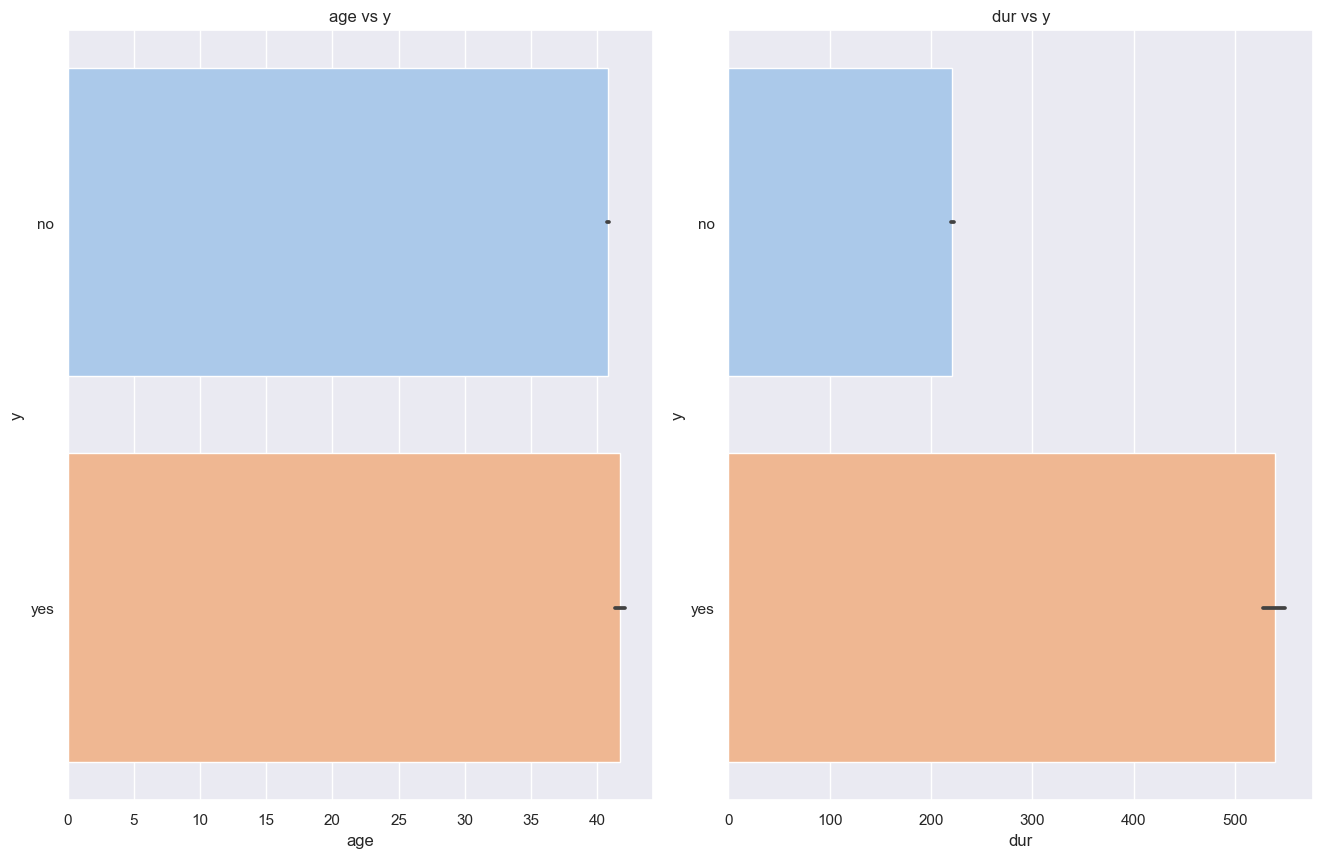

In [28]:
#plotting continous feature vs categorical target variable
plt.figure(figsize=(20,25))
plt.subplot(331)
sns.barplot(x=df['age'],y=df['y'])
plt.title("age vs y")

plt.subplot(332)
sns.barplot(x=df['dur'],y=df['y'])
plt.title("dur vs y")
plt.tight_layout()


#Interpretation from above graph
1.age higher person opted for more insurance
2.duration of call higher person opted for more insurance

C:\Users\MURUGAN K\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves
C:\Users\MURUGAN K\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


Text(0.5, 1.0, 'num_calls vs y')

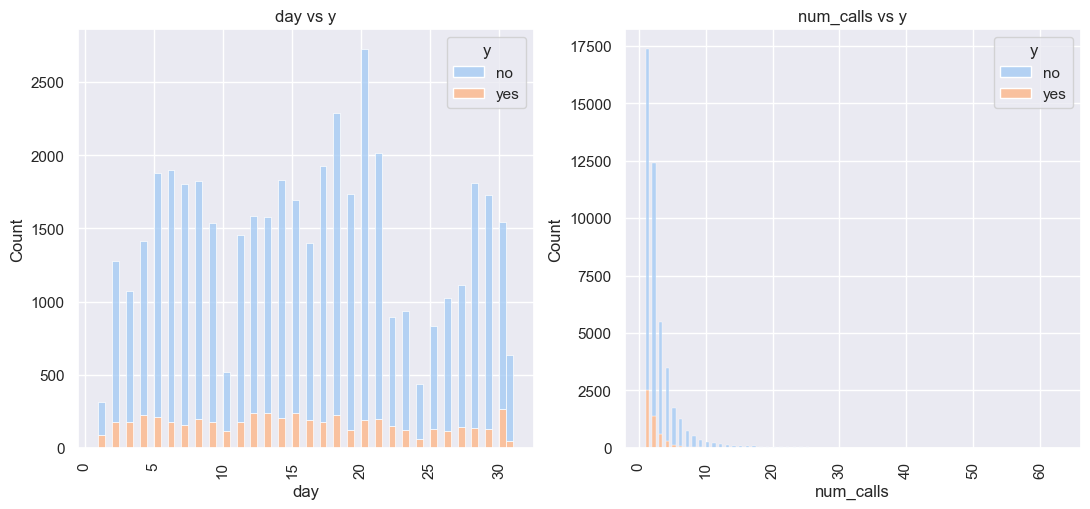

In [29]:
plt.figure(figsize=(20,25))
plt.subplot(431)
sns.histplot(binwidth=0.5, x=df["day"],hue=df["y"],data=df, stat="count", multiple="stack")
plt.xticks(rotation=90)
plt.title("day vs y")

plt.subplot(432)
sns.histplot(binwidth=0.5, x=df["num_calls"],hue=df["y"],data=df, stat="count", multiple="stack")
plt.xticks(rotation=90)
plt.title("num_calls vs y")

In [30]:
df2=df.copy()

#Interpretation from above graph
    1.in day graph there is increase and decrease during weekend there is increased and during month end there is maximum rate        yes y conversion rate
    2.num_calls gets increases there is decrease conversion rate
     numcalls inversely proportional to y (yes rate)

In [31]:
#Encoding categorical features
df["job"]=df["job"].map({"housemaid":0,"entrepreneur":1,"self-employed":2,"unemployed":3,"student":4,"services":5,"retired":6,
                         "admin.":7,"blue-collar":8,"technician":9,"management":10})
df["education_qual"]=df["education_qual"].map({"primary":0,"tertiary":1,"secondary":2})
df["call_type"]=df["call_type"].map({"telephone":0,"cellular":1})
df["mon"]=df["mon"].map({"dec":0,"jan":1,"mar":2,"sep":3,"oct":4,"nov":5,"feb":6,"jun":7,"apr":8,"jul":9,"aug":10,"may":11})
ohe1=pd.get_dummies(df[["marital"]])
df=df.drop("marital",axis=1)
df=pd.concat([df,ohe1],axis=1)
#df=df.join(ohe1)
ohe2=pd.get_dummies(df[["prev_outcome"]])
df=df.drop("prev_outcome",axis=1)
df=pd.concat([df,ohe2],axis=1)

In [32]:
df.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,y,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,10,1,1,5,11,261,1,no,0,1,0,0,0,0,1
1,44,9,2,1,5,11,151,1,no,0,0,1,0,0,0,1
2,33,1,2,1,5,11,76,1,no,0,1,0,0,0,0,1
3,47,8,2,1,5,11,92,1,no,0,1,0,0,0,0,1
5,35,10,1,1,5,11,139,1,no,0,1,0,0,0,0,1


In [33]:
#mapping the target variabe to numeric    yes--->1   and no--->0
df["y"]=df.y.map({"yes":1,"no":0}).values

In [34]:
#Splitting of data
X=df[[i for i in df.columns if i !="y"]]
y=df["y"]

In [35]:
X.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,10,1,1,5,11,261,1,0,1,0,0,0,0,1
1,44,9,2,1,5,11,151,1,0,0,1,0,0,0,1
2,33,1,2,1,5,11,76,1,0,1,0,0,0,0,1
3,47,8,2,1,5,11,92,1,0,1,0,0,0,0,1
5,35,10,1,1,5,11,139,1,0,1,0,0,0,0,1


In [36]:
y.head()

0    0
1    0
2    0
3    0
5    0
Name: y, dtype: int64

In [37]:
#Checking data imbalance
df["y"].value_counts()
#yes is less so need to use oversampling techniques to balance data

0    39517
1     5208
Name: y, dtype: int64

In [38]:
#Splitting data into training 80 % and testing 20 %
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [39]:
print("X_train_size",X_train.shape,"X_test_size",X_test.shape,"y_train_size",y_train.shape,"y_test_size",y_test.shape)

X_train_size (35780, 15) X_test_size (8945, 15) y_train_size (35780,) y_test_size (8945,)


Text(0.5, 1.0, 'y_test')

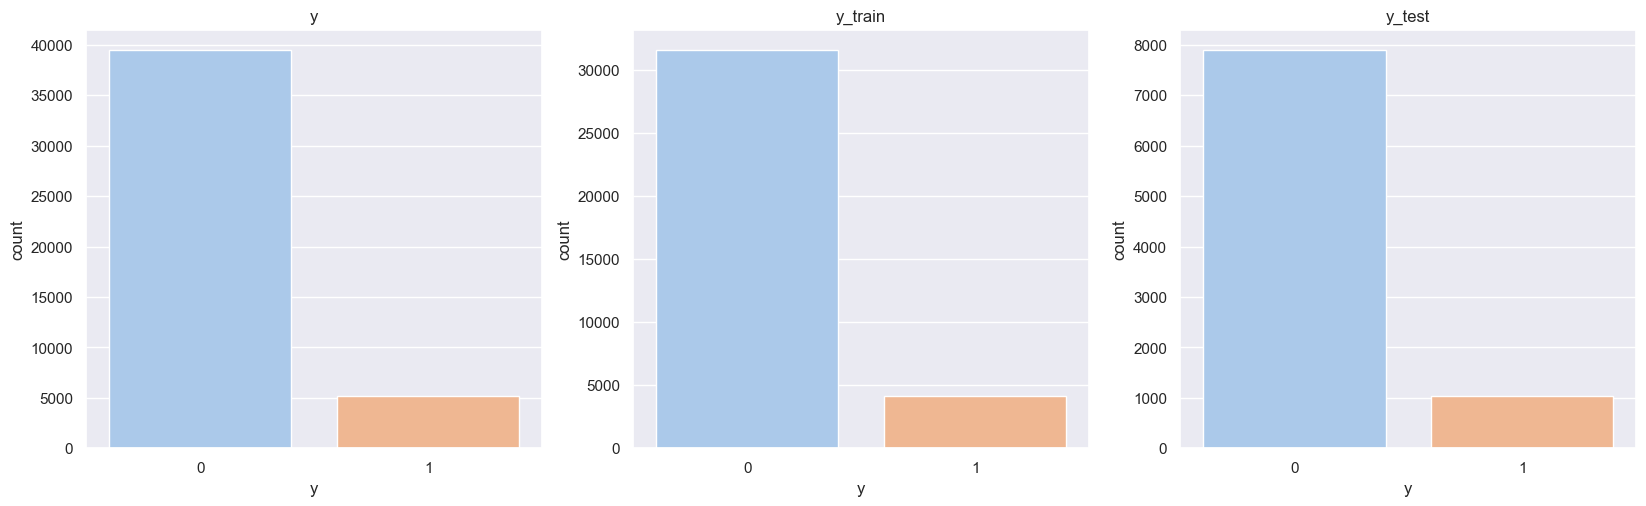

In [40]:
plt.figure(figsize=(20,25))
plt.subplot(431)
sns.countplot(x=y)
plt.title("y")

plt.subplot(432)
sns.countplot(x=y_train)
plt.title("y_train")

plt.subplot(433)
sns.countplot(x=y_test)
plt.title("y_test")

#checked the data in y both yes no is present in train,test (stratify)

In [41]:
#oversampling
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,y_smote=smote.fit_resample(X_train,y_train)
y_smote.value_counts()

0    31614
1    31614
Name: y, dtype: int64

Text(0.5, 1.0, 'y_smote')

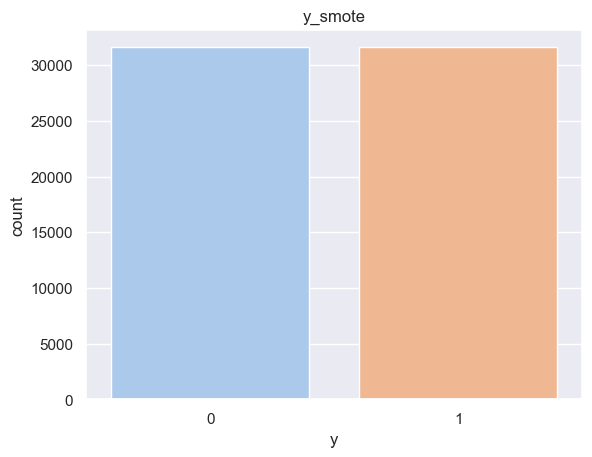

In [42]:
sns.countplot(x=y_smote)
plt.title("y_smote")

In [43]:
#updating back to X_train and y_train
X_train=X_smote.copy()
y_train=y_smote.copy()

In [44]:
#scaling for age, day, dur, num_calls
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[["age","day","dur","num_calls"]]=scaler.fit_transform(X_train[["age","day","dur","num_calls"]])
X_test[["age","day","dur","num_calls"]]=scaler.transform(X_test[["age","day","dur","num_calls"]])

In [45]:
X_train.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,-0.955066,10,1,1,0.575333,10,0.478315,0.661268,0,1,0,0,0,0,1
1,-0.955066,8,2,1,0.575333,11,1.028630,1.054995,0,0,1,0,0,0,1
2,0.246235,9,2,1,-1.136740,10,-0.481208,0.267541,0,1,0,0,0,0,1
3,-0.096994,0,1,1,1.920534,9,3.043629,1.448722,0,0,1,0,0,0,1
4,-0.182801,8,0,1,1.798243,9,-0.342924,0.661268,0,1,0,0,0,0,1


In [46]:
X_test.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
9767,-0.354416,7,2,1,-0.769867,7,-0.828330,-0.519913,0,1,0,0,0,0,1
35688,-1.555717,9,2,1,-0.892158,11,1.073784,-0.519913,0,0,1,0,0,0,1
30565,1.018500,0,0,1,-1.259031,6,-0.430410,-0.126186,0,0,1,0,0,0,1
29686,-1.126681,8,2,1,-1.503613,6,-1.023056,1.054995,0,0,1,0,0,0,1
8784,-0.526030,1,2,1,-1.381322,7,-0.577160,1.448722,0,1,0,0,0,0,1


In [49]:
#logistic regression
#grid search cv for log reg selecting best params 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
params={"C":[0.001,0.01,0.1,1,10]}
from sklearn.model_selection import GridSearchCV
log_reg=LogisticRegression(max_iter=1000,random_state=0)
log_reg.fit(X_train,y_train)
print("cross_val_score",cross_val_score(log_reg,X_train,y_train,cv=15).mean())
gscv_log=GridSearchCV(log_reg,params,cv=5)
gscv_log.fit(X_train,y_train)
print("train score",gscv_log.score(X_train,y_train))
print("test score",gscv_log.score(X_test,y_test))
print(gscv_log.best_params_)

cross_val_score 0.8874599540960532
train score 0.8898431074840261
test score 0.8831749580771381
{'C': 0.1}


In [50]:
#Logistic Regression by tuning c params from default 1 to 0.1 the auroc score changes from 0.8536 to 0.8558
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(max_iter=1000,C=0.1,random_state=0)
log_reg.fit(X_train,y_train)
y_pred_log=log_reg.predict(X_test)
print("testing score",log_reg.score(X_test,y_test))  #accuracy
print("training score",log_reg.score(X_train,y_train))

testing score 0.8831749580771381
training score 0.8898431074840261


In [51]:
from sklearn.model_selection import cross_val_score
cross_val_log_score=cross_val_score(log_reg,X_train,y_train,scoring="accuracy",cv=10).mean()
print("cross validation score in logistic_regression",cross_val_log_score)

cross validation score in logistic_regression 0.8866175709284679


In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [51]:
#KNN classifier for selecting best value of k
from sklearn.neighbors import KNeighborsClassifier
knn_values=np.arange(1,50)
cross_val_knn=[]
train_score_knn=[]
test_score_knn=[]
for k in knn_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train=knn.score(X_train,y_train)
    train_score_knn.append(train)
    test=knn.score(X_test,y_test)
    test_score_knn.append(test)
    print("k value",k,"train score ",train,"test score",test,"cross val score",cross_val_score(knn,X_train,y_train,cv=10).mean())
    cross_val_knn.append(cross_val_score(knn,X_train,y_train,cv=10).mean())
cross_val_knn_max=max(cross_val_knn)

k value 1 train score  1.0 test score 0.8595863610955842 cross val score 0.9178535371210981
k value 2 train score  0.9670399190232175 test score 0.881162660704304 cross val score 0.9149436211121798
k value 3 train score  0.9569810843297273 test score 0.8718837339295696 cross val score 0.9202415990031122
k value 4 train score  0.9492471689757702 test score 0.8818334264952488 cross val score 0.9185336415869854
k value 5 train score  0.944897830075283 test score 0.870653996646171 cross val score 0.9198303567573387
k value 6 train score  0.9413867273992534 test score 0.8817216321967579 cross val score 0.9167305798673266
k value 7 train score  0.9373853356108054 test score 0.8752375628842929 cross val score 0.9179640939664641
k value 8 train score  0.9333997596001772 test score 0.8810508664058133 cross val score 0.915449417303835
k value 9 train score  0.9324982602644398 test score 0.875684740078256 cross val score 0.916287574480276
k value 10 train score  0.9301258935914468 test score 0.88

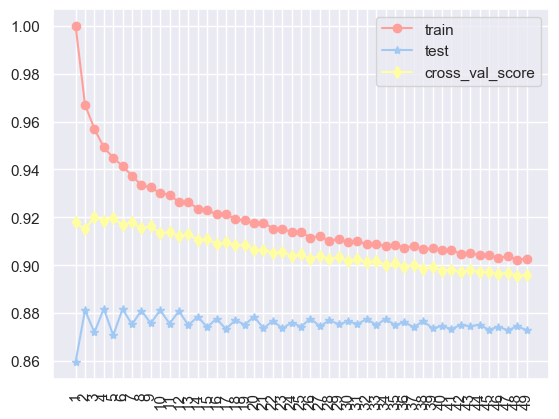

In [96]:
i=[ i for i in range(1,50,1)]
plt.plot(i,train_score_knn,'ro-',label='train')
plt.plot(i,test_score_knn,'b*-',label='test')
plt.plot(i,cross_val_knn,'yd-',label='cross_val_score')
plt.xticks(i,rotation=90)
plt.legend()

In [64]:
for i in range(1,50):
    print("k value",i,"diff",cross_val_knn[i-1]-test_score_knn[i-1])

k value 1 diff 0.0582671760255139
k value 2 diff 0.033780960407875704
k value 3 diff 0.04835786507354256
k value 4 diff 0.0367002150917366
k value 5 diff 0.04917636011116766
k value 6 diff 0.035008947670568724
k value 7 diff 0.04272653108217117
k value 8 diff 0.034398550898021685
k value 9 diff 0.04060283440201995
k value 10 diff 0.03211887365183119
k value 11 diff 0.03829479867396812
k value 12 diff 0.03131656886993239
k value 13 diff 0.03819057333692799
k value 14 diff 0.03209847662096832
k value 15 diff 0.03696455064884563
k value 16 diff 0.031221462384994347
k value 17 diff 0.03616550293044718
k value 18 diff 0.03129015526989509
k value 19 diff 0.03336460638437211
k value 20 diff 0.027844041876549874
k value 21 diff 0.03285783514460461
k value 22 diff 0.02825567411024532
k value 23 diff 0.032146150156114994
k value 24 diff 0.027646442243678182
k value 25 diff 0.030145741147559524
k value 26 diff 0.024925696932849517
k value 27 diff 0.02955951604020768
k value 28 diff 0.025645010921

In [120]:
#grid search cv for knn selecting best params 
params={"n_neighbors":[i for i in range(1,50,2)],"weights":["uniform","distance"],"p":[1,2]}
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
print("cross_val_score",cross_val_score(knn,X_train,y_train,cv=15).mean())
gscv_knn=GridSearchCV(knn,params,cv=5)
gscv_knn.fit(X_train,y_train)
print("train score",gscv_knn.score(X_train,y_train))
print("test score",gscv_knn.score(X_test,y_test))
print(gscv_knn.best_params_)

cross_val_score 0.9209561308930261
train score 1.0
test score 0.8812744550027949
{'n_neighbors': 11, 'p': 1, 'weights': 'distance'}


In [121]:
#since cross val score high and test score also high and donot differ much choosing k=11
print("the best value of k is 11 and cross val score is",cross_val_knn[10])

the best value of k is 11 and cross val score is 0.9138677444537333


In [54]:
#training model by best value of k, weight and p (by tuning additionally weight and (k from 7 to 11) 
#and p auroc score increased from 0.8474 to 0.8654)
knn=KNeighborsClassifier(n_neighbors=11,weights="distance",p=1)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
knn_cross_final=cross_val_score(knn,X_train,y_train,cv=15).mean()
print("cross val score",cross_val_score(knn,X_train,y_train,cv=15).mean())

cross val score 0.9324701545562932


In [72]:
#Decision tree for selecting best parameter for max depth d
from sklearn.tree import DecisionTreeClassifier
cross_val_dt=[]
train_score_dt=[]
test_score_dt=[]
max_depth=np.arange(1,20)
for d in max_depth:
    dt=DecisionTreeClassifier(max_depth=d,random_state=0)
    dt.fit(X_train,y_train)
    train=dt.score(X_train,y_train)
    test=dt.score(X_test,y_test)
    train_score_dt.append(train)
    test_score_dt.append(test)
    print("depth value is",d,"training score",train,"test score",test,"cross val score",cross_val_score(dt,X_train,y_train,cv=15).mean())
    cross_val_dt.append(cross_val_score(dt,X_train,y_train,cv=15).mean())
cross_val_dt_depth_max=max(cross_val_dt)

depth value is 1 training score 0.7261181754918707 test score 0.7130240357741755 cross val score 0.7258652308740434
depth value is 2 training score 0.757765546909597 test score 0.6253773057574064 cross val score 0.7535760735243471
depth value is 3 training score 0.8293319415448852 test score 0.8392397987702627 cross val score 0.8311210414598624
depth value is 4 training score 0.8463339027013349 test score 0.8744550027948574 cross val score 0.8440597081445366
depth value is 5 training score 0.8624659960776871 test score 0.8377864728898826 cross val score 0.8578510755314255
depth value is 6 training score 0.8776016954513823 test score 0.8624930128563443 cross val score 0.8710099468555648
depth value is 7 training score 0.8866325045865756 test score 0.8673001676914477 cross val score 0.8792183236130712
depth value is 8 training score 0.8974821281710634 test score 0.8791503633314701 cross val score 0.8877433123021528
depth value is 9 training score 0.9127601695451383 test score 0.868753493

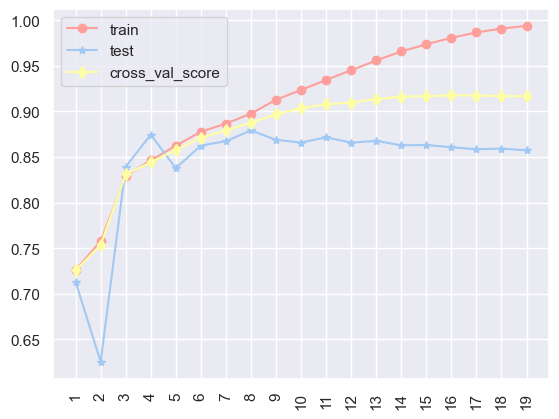

In [95]:
i=[i for i in range(1,20)]
plt.plot(i,train_score_dt,'ro-',label='train')
plt.plot(i,test_score_dt,'b*-',label='test')
plt.plot(i,cross_val_dt,'yd-',label='cross_val_score')
plt.xticks(i,rotation=90)
plt.legend()

In [100]:
print("the best value d is 8 and cross val score is",cross_val_dt[7])  #since list index starts from 0

the best value d is 8 and cross val score is 0.8877433123021528


In [55]:
#training the model by best value of d
dt=DecisionTreeClassifier(max_depth=8,random_state=0)
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
dt_cross_final=cross_val_score(dt,X_train,y_train,cv=15).mean()
print("cross val score",cross_val_score(dt,X_train,y_train,cv=15).mean())

cross val score 0.8908589545334835


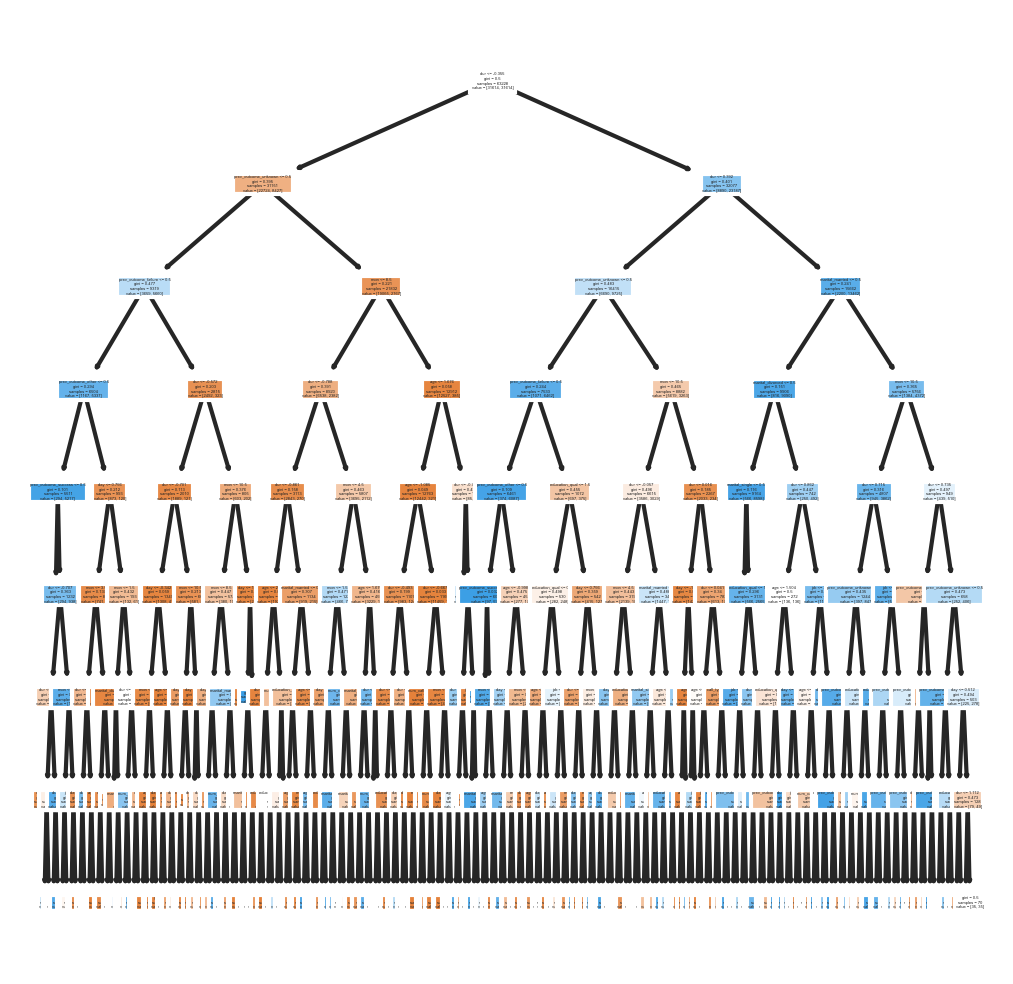

In [148]:
from sklearn.tree import plot_tree
#fig=plt.figure(figsize=(25,20))
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dt,max_depth=8,filled=True,feature_names=X_train.columns)
fig.savefig('imagename.png')

In [103]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
cross_val_rf=[]
train_score_rf=[]
test_score_rf=[]
max_depth=np.arange(1,21)
for d in max_depth:
    rf=RandomForestClassifier(max_depth=d,random_state=0)
    rf.fit(X_train,y_train)
    train=rf.score(X_train,y_train)
    test=rf.score(X_test,y_test)
    train_score_rf.append(train)
    test_score_rf.append(test)
    print("depth value is",d,"training score",train,"test score",test,"cross val score",cross_val_score(rf,X_train,y_train,cv=15).mean())
    cross_val_rf.append(cross_val_score(rf,X_train,y_train,cv=15).mean())
cross_val_rf_max=max(cross_val_rf)    

depth value is 1 training score 0.8163788195103435 test score 0.7785354946897708 cross val score 0.8163656536735538
depth value is 2 training score 0.8421427215790472 test score 0.8029066517607601 cross val score 0.8405485026444665
depth value is 3 training score 0.8652337571961789 test score 0.8359977641140302 cross val score 0.8632758033378277
depth value is 4 training score 0.8781710634529006 test score 0.8447177193963108 cross val score 0.8757544213874277
depth value is 5 training score 0.8821408236857089 test score 0.8524315259921744 cross val score 0.8790285590377428
depth value is 6 training score 0.8919307901562599 test score 0.8660704304080492 cross val score 0.8860193895030174
depth value is 7 training score 0.9011355728474726 test score 0.8698714365567356 cross val score 0.8923618098370104
depth value is 8 training score 0.9092648826469286 test score 0.873225265511459 cross val score 0.8991152760802021
depth value is 9 training score 0.9177421395584234 test score 0.873672442

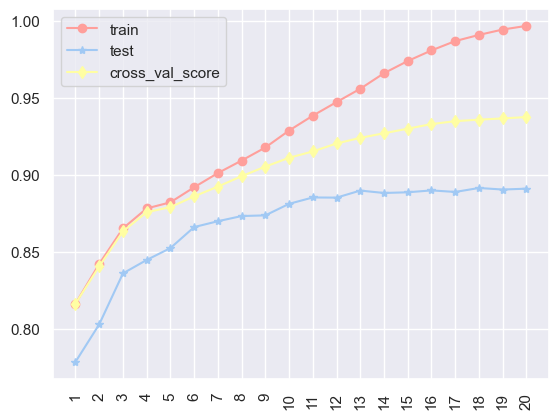

In [104]:
i=[i for i in range(1,21)]
plt.plot(i,train_score_rf,'ro-',label='train')
plt.plot(i,test_score_rf,'b*-',label='test')
plt.plot(i,cross_val_rf,'yd-',label='cross_val_score')
plt.xticks(i,rotation=90)
plt.legend()

In [107]:
for d in range(1,21):
    print("max_depth value",d,"diff",cross_val_rf[d-1]-test_score_rf[d-1])

max_depth value 1 diff 0.03783015898378306
max_depth value 2 diff 0.03764185088370631
max_depth value 3 diff 0.027278039223797568
max_depth value 4 diff 0.031036701991116855
max_depth value 5 diff 0.026597033045568375
max_depth value 6 diff 0.01994895909496819
max_depth value 7 diff 0.02249037328027481
max_depth value 8 diff 0.025890010568743183
max_depth value 9 diff 0.031658515147431676
max_depth value 10 diff 0.029909816960852043
max_depth value 11 diff 0.029885605217874534
max_depth value 12 diff 0.03515332887620859
max_depth value 13 diff 0.03423911091158649
max_depth value 14 diff 0.03877770839321404
max_depth value 15 diff 0.04130387719781203
max_depth value 16 diff 0.04306326867731036
max_depth value 17 diff 0.04596739325327592
max_depth value 18 diff 0.04437680166253277
max_depth value 19 diff 0.046173735495519175
max_depth value 20 diff 0.04651630986612065


In [134]:
#grid search cv for random forest selecting best params 
params={"n_estimators":[50,100,150],"criterion":["gini","entropy"],"max_depth":[i for i in range(1,21,1)]}
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)
print("cross_val_score",cross_val_score(rf,X_train,y_train,cv=15).mean())
gscv_rf=GridSearchCV(rf,params,cv=5)
gscv_rf.fit(X_train,y_train)
print("train score",gscv_rf.score(X_train,y_train))
print("test score",gscv_rf.score(X_test,y_test))
print(gscv_rf.best_params_)

cross_val_score 0.9394780358092802
train score 0.9967103182134497
test score 0.8910005589714924
{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 100}


In [139]:
print("the best value d is 20 and cross val score is",cross_val_rf[19])

the best value d is 20 and cross val score is 0.9375168688376131


In [56]:
#training the model by best value of d, max_depth,n_estimators,criterion 
#(by increaing d value from 8 to 20 auroc increases from 0.8924 to 0.9044
#default value gets selected for n_estimators,criterion)
rf=RandomForestClassifier(max_depth=20,n_estimators=100,criterion="gini",random_state=0)
rf.fit(X_train,y_train)
y_pred_rf=dt.predict(X_test)
rf_cross_final=cross_val_score(rf,X_train,y_train,cv=15).mean()
print("cross val score",cross_val_score(rf,X_train,y_train,cv=15).mean())

cross val score 0.9377541617802747


In [ ]:
#Extreme gradient boosting technique
import xgboost as xgb
cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.09,0.1,0.11,0.12,0.13,0.15,0.18,0.2,0.25,0.3]:
    xgb_classifier=xgb.XGBClassifier(learning_rate=lr,n_estimators=1000,random_state=0)
    xgb_classifier.fit(X_train,y_train)
    print("Learning rate",lr,"cross_val_score",cross_val_score(xgb_classifier,X_train,y_train,cv=15).mean())
    cross_val_xgb.append(cross_val_score(xgb_classifier,X_train,y_train,cv=15).mean())
cross_val_xgb_max=max(cross_val_xgb)

Learning rate 0.01 cross_val_score 0.9235830851684034
Learning rate 0.05 cross_val_score 0.9338793411980795
Learning rate 0.08 cross_val_score 0.9363624123356916
Learning rate 0.09 cross_val_score 0.9366629413790545
Learning rate 0.1 cross_val_score 0.9379281548459129
Learning rate 0.11 cross_val_score 0.9380073200213388
Learning rate 0.12 cross_val_score 0.938908734580198
Learning rate 0.13 cross_val_score 0.9383551785999672
Learning rate 0.15 cross_val_score 0.9382761672380275
Learning rate 0.18 cross_val_score 0.939051105843937
Learning rate 0.2 cross_val_score 0.9393674101485389
Learning rate 0.25 cross_val_score 0.9402530006760291
Learning rate 0.3 cross_val_score 0.9406325485844284


In [55]:
#to determine the best params with help of grid search CV
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
xgb_classifier=xgb.XGBClassifier(random_state=0)
xgb_classifier.fit(X_train,y_train)
print("cross_val_score",cross_val_score(xgb_classifier,X_train,y_train,cv=15).mean())
params={"n_estimators":[100,1000],"learning_rate":[0.05,0.1,0.5]}
gscv=GridSearchCV(xgb_classifier,params,cv=5)
gscv.fit(X_train,y_train)
print("train score",gscv.score(X_train,y_train))
print("test score",gscv.score(X_test,y_test))
print(gscv.best_params_)

cross_val_score 0.9310166771334868
train score 1.0
test score 0.8903297931805478
{'learning_rate': 0.5, 'n_estimators': 1000}


In [ ]:
print("The best Learning rate is  and Cross_val_score is:",cross_val_xgb_max)

In [57]:
#training the model by best value of lr
import xgboost as xgb
xgb_classifier=xgb.XGBClassifier(learning_rate=0.5,n_estimators=1000,random_state=0)
xgb_classifier.fit(X_train,y_train)
y_pred_xgb=xgb_classifier.predict(X_test)
xgb_cross_final=cross_val_score(xgb_classifier,X_train,y_train,cv=15).mean()
print("cross_val_score",cross_val_score(xgb_classifier,X_train,y_train,cv=15).mean())   

cross_val_score 0.9406957734304834


In [58]:
#Cross validation score
print("Cross Validation Score for Logistic Regression:",cross_val_log_score)
print("Cross Validation Score for K-Nearest Neighbors Classification:",knn_cross_final)
print("Cross Validation Score for Decision Tree Classification: ",dt_cross_final)
print("Cross Validation Score for Random Forest Classification: ",rf_cross_final)
print("Cross Validation Score for Extreme-Gradient Boosting Classification: ",xgb_cross_final)

Cross Validation Score for Logistic Regression: 0.8866175709284679
Cross Validation Score for K-Nearest Neighbors Classification: 0.9324701545562932
Cross Validation Score for Decision Tree Classification:  0.8908589545334835
Cross Validation Score for Random Forest Classification:  0.9377541617802747
Cross Validation Score for Extreme-Gradient Boosting Classification:  0.9406957734304834


In [59]:
#accuracy score, precision,recall,f1 score,roc_auc score
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,classification_report,precision_score,recall_score
#confusion matrix
conf_log=confusion_matrix(y_test,y_pred_log)
conf_knn=confusion_matrix(y_test,y_pred_knn)
conf_dt=confusion_matrix(y_test,y_pred_dt)
conf_rf=confusion_matrix(y_test,y_pred_rf)
conf_xgb=confusion_matrix(y_test,y_pred_xgb)

print("confusion_matrix for logistic regression",conf_log)
print("confusion_matrix for KNN Classification",conf_knn)
print("confusion_matrix for Decision Tree Classification",conf_dt)
print("confusion_matrix for Random Forest Classification",conf_rf)
print("confusion_matrix for Extreme Gradient Boosting Classification",conf_xgb)


print("classification_report for logistic regression")
print(classification_report(y_test,y_pred_log))
print("classification_report for KNN Classification")
print(classification_report(y_test,y_pred_knn))
print("classification_report for Decision Tree Classification")
print(classification_report(y_test,y_pred_dt))
print("classification_report for Random Forest Classification")
print(classification_report(y_test,y_pred_rf))
print("classification_report for Extreme Gradient Boosting Classification")
print(classification_report(y_test,y_pred_xgb))
      
print("precision_score for logistic regression",precision_score(y_test,y_pred_log))
print("precision_score for KNN Classification",precision_score(y_test,y_pred_knn))
print("precision_score for Decision Tree Classification",precision_score(y_test,y_pred_dt))
print("precision_score for Random Forest Classification",precision_score(y_test,y_pred_rf))
print("precision_score for Extreme Gradient Boosting Classification",precision_score(y_test,y_pred_xgb))

print("recall_score for logistic regression",recall_score(y_test,y_pred_log))
print("recall_score for KNN Classification",recall_score(y_test,y_pred_knn))
print("recall_score for Decision Tree Classification",recall_score(y_test,y_pred_dt))
print("recall_score for Random Forest Classification",recall_score(y_test,y_pred_rf))
print("recall_score for Extreme Gradient Boosting Classification",recall_score(y_test,y_pred_xgb))

print("accuracy for logistic regression",accuracy_score(y_test,y_pred_log))
print("accuracy for KNN Classification",accuracy_score(y_test,y_pred_knn))
print("accuracy for Decision Tree Classification",accuracy_score(y_test,y_pred_dt))
print("accuracy for Random Forest Classification",accuracy_score(y_test,y_pred_rf))
print("accuracy for Extreme Gradient Boosting Classification",accuracy_score(y_test,y_pred_xgb))

print("AUROC for logistic regression",roc_auc_score(y_test,log_reg.predict_proba(X_test)[:,1]))
print("AUROC for KNN classification",roc_auc_score(y_test,knn.predict_proba(X_test)[:,1]))
print("AUROC for Decision Tree classification",roc_auc_score(y_test,dt.predict_proba(X_test)[:,1]))
print("AUROC for Random Forest classification",roc_auc_score(y_test,rf.predict_proba(X_test)[:,1]))
print("AUROC for Extreme Gradient Boosting Classification",roc_auc_score(y_test,xgb_classifier.predict_proba(X_test)[:,1]))

confusion_matrix for logistic regression [[7373  530]
 [ 515  527]]
confusion_matrix for KNN Classification [[7294  609]
 [ 457  585]]
confusion_matrix for Decision Tree Classification [[7245  658]
 [ 400  642]]
confusion_matrix for Random Forest Classification [[7245  658]
 [ 400  642]]
confusion_matrix for Extreme Gradient Boosting Classification [[7466  437]
 [ 510  532]]
classification_report for logistic regression
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7903
           1       0.50      0.51      0.50      1042

    accuracy                           0.88      8945
   macro avg       0.72      0.72      0.72      8945
weighted avg       0.88      0.88      0.88      8945

classification_report for KNN Classification
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7903
           1       0.49      0.56      0.52      1042

    accuracy                           0

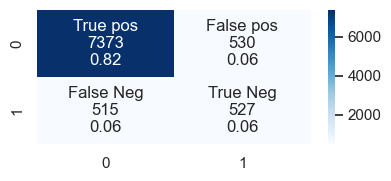

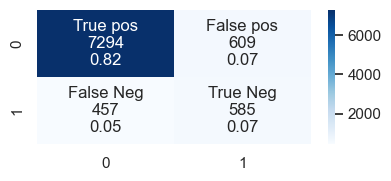

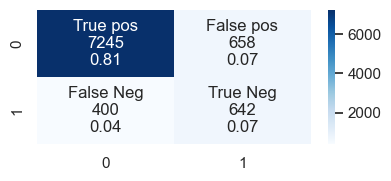

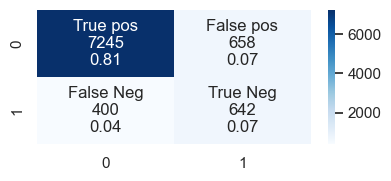

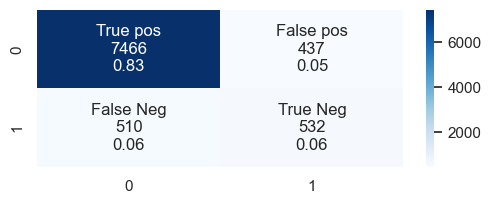

In [60]:
i=431
for cm in [conf_log,conf_knn,conf_dt,conf_rf,conf_xgb]:
    group_name=["True pos","False pos","False Neg","True Neg"]
    group_counts=["{0:0.0f}".format(value) for value in cm.flatten()]
    group_per=["{0:.2f}".format(i) for i in cm.flatten()/np.sum(cm)]
    labels=[f'{v1}\n{v2}\n{v3}' for v1,v2,v3 in zip(group_name,group_counts,group_per)]
    labels=np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(15,8))
    plt.subplot(i)
    sns.heatmap(cm,annot=labels,fmt="",cmap="Blues")
    i=i+1
plt.tight_layout()

In [61]:
#Important features contribute to conversion rate
#feature importance by decision tree
ftimp=list(zip(dt.feature_importances_,X_train.columns))
imp=pd.DataFrame(ftimp,columns=["Importances","features"])
imp.sort_values("Importances",ascending=False,inplace=True)
imp

,Importances,features
6,0.451360,dur
14,0.159380,prev_outcome_unknown
11,0.113890,prev_outcome_failure
5,0.082664,mon
12,0.064651,prev_outcome_other
4,0.028187,day
10,0.023591,marital_single
0,0.021969,age
9,0.019236,marital_married
8,0.010826,marital_divorced


In [62]:
#feature importanes by random forest
rf.feature_importances_

array([0.07339678, 0.04835381, 0.04502969, 0.00698617, 0.06274192,
       0.1051775 , 0.31970234, 0.03334674, 0.02871833, 0.04237233,
       0.03305701, 0.05454262, 0.02302374, 0.00699567, 0.11655533])

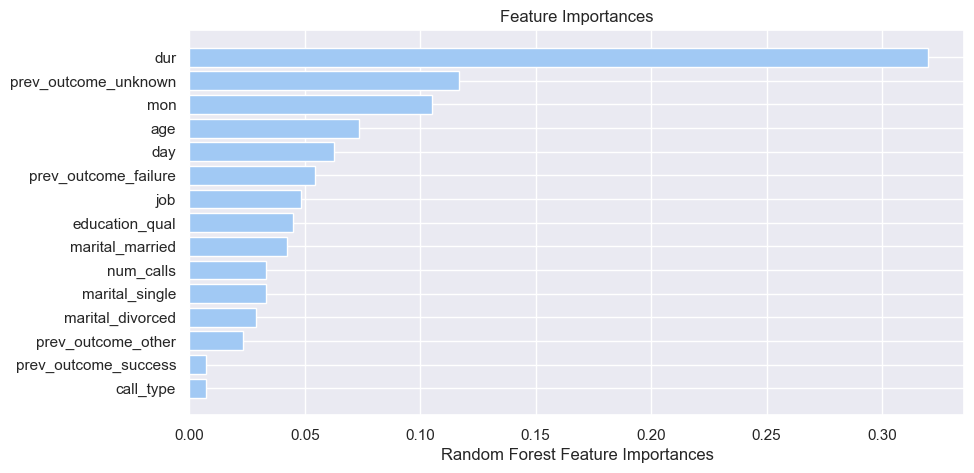

In [63]:
sorted_index=rf.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(X_train.columns[sorted_index],rf.feature_importances_[sorted_index])
plt.title("Feature Importances")
plt.xlabel("Random Forest Feature Importances")
plt.show()

In [64]:
#feature importanes by extreme gradient boosting
xgb_classifier.feature_importances_

array([0.0067323 , 0.00964011, 0.01764225, 0.01304266, 0.00729103,
       0.02704003, 0.02003184, 0.00749142, 0.09405321, 0.02843804,
       0.0419509 , 0.23468798, 0.25597647, 0.04264493, 0.19333681],
      dtype=float32)

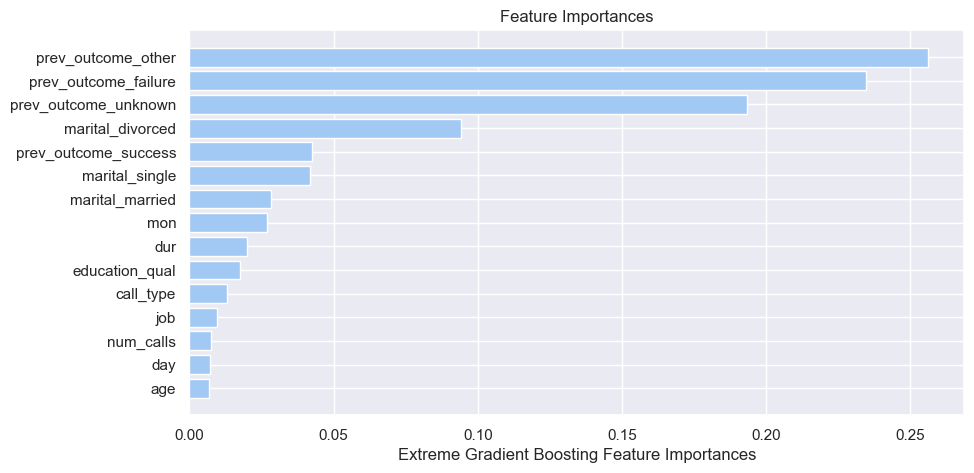

In [65]:
sorted_index=xgb_classifier.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(X_train.columns[sorted_index],xgb_classifier.feature_importances_[sorted_index])
plt.title("Feature Importances")
plt.xlabel("Extreme Gradient Boosting Feature Importances")
plt.show()

#selection of feature importances by best ML algorithm Random Forest Classifier which has highest AUROC score
Feature importances in orderwise for telephonic marketing to effectively convert customer to buy insurance

1. duration of call
2. previous outcome unknown (previous call status)
3. month
4. age
5. day
6. previous outcome failure
7. job
8. education qualification
9. marital married
10. number of calls
11. marital single
12. marital divorced
13. previous outcome other
14. previous outcome success
15. call type

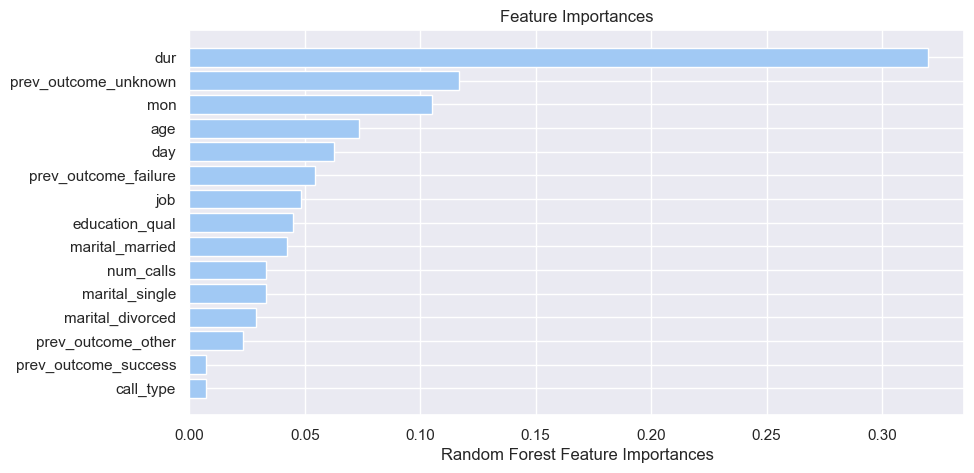

In [66]:
sorted_index=rf.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(X_train.columns[sorted_index],rf.feature_importances_[sorted_index])
plt.title("Feature Importances")
plt.xlabel("Random Forest Feature Importances")
plt.show()